# Car price prediction

#### Import libraries

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

#### Dataset

In [2]:
car_data=pd.read_csv("CAR DETAILS FROM CAR DEKHO.csv")

In [3]:
car_data.head(4)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner


In [4]:
car_data.shape

(4340, 8)

#### datacleaning
- `name columns`- we split a car name and model. 

In [5]:
car_data[["car_name","model"]]=car_data["name"].str.split(" ",n=1,expand=True)

In [6]:
car_data.drop(columns=["name"],inplace=True)

In [7]:
car_data.head(3)

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,car_name,model
0,2007,60000,70000,Petrol,Individual,Manual,First Owner,Maruti,800 AC
1,2007,135000,50000,Petrol,Individual,Manual,First Owner,Maruti,Wagon R LXI Minor
2,2012,600000,100000,Diesel,Individual,Manual,First Owner,Hyundai,Verna 1.6 SX


#### Perform some EDA

<Axes: >

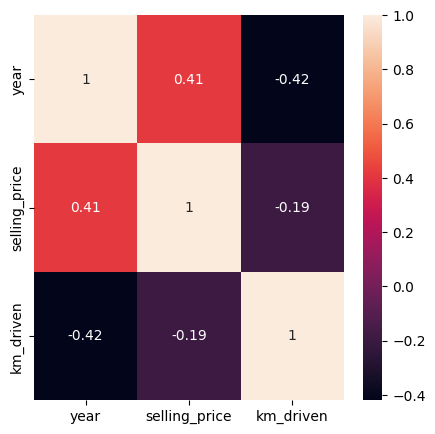

In [8]:
plt.figure(figsize=(5,5))
sns.heatmap(data=car_data.corr(numeric_only='TRUE'),annot=True)

#### Heat map observation 
- year is positive correlation to selling price
- km driven is negative correlation with selling price
  




In [9]:
car_data.describe().T

,count,mean,std,min,25%,50%,75%,max
year,4340.0,2013.090783,4.215344,1992.0,2011.00,2014.0,2016.0,2020.0
selling_price,4340.0,504127.311751,578548.736139,20000.0,208749.75,350000.0,600000.0,8900000.0
km_driven,4340.0,66215.777419,46644.102194,1.0,35000.00,60000.0,90000.0,806599.0


#### From the statistics summary, we can infer the below findings :
- years 1992 the min price 20000
- max price is record 8900000 in year 2020

C:\Users\priye\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\priye\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\priye\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\priye\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: T

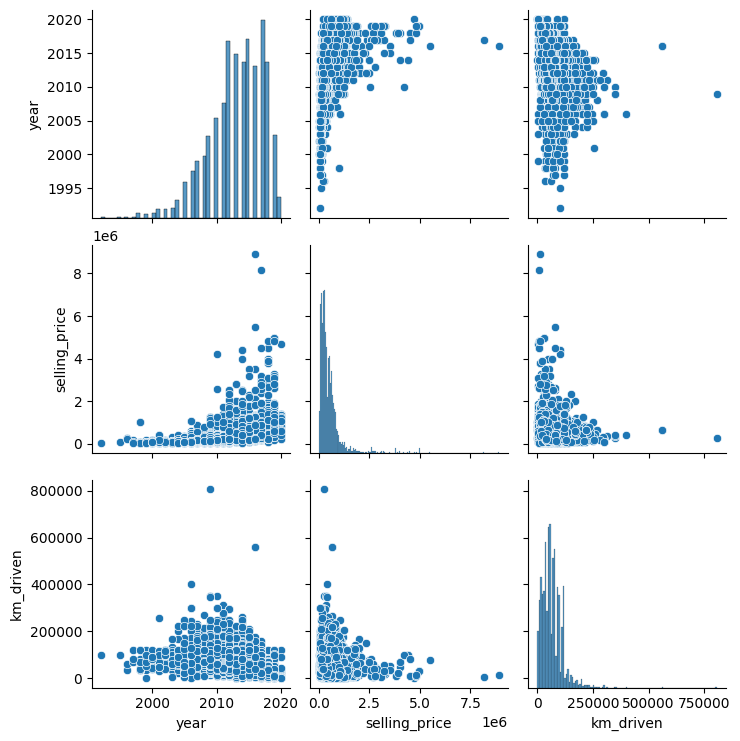

In [10]:

sns.pairplot(data=car_data)


# Feacture transformation

In [11]:
import numpy as np
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder

#### Nan Values
- Here is not present a nan value

In [12]:
(car_data.isnull().sum()/car_data.shape[0])*100

year             0.0
selling_price    0.0
km_driven        0.0
fuel             0.0
seller_type      0.0
transmission     0.0
owner            0.0
car_name         0.0
model            0.0
dtype: float64

#### Encoding
-------------
=> OneHotEncoder 
- fuel
- seller type
- transmission 
- car_name
- model
==> this all have Nominal Data
- --------------
=> OrdinalEncoder
- owner        

In [13]:
car_data.select_dtypes(include="object").columns

Index(['fuel', 'seller_type', 'transmission', 'owner', 'car_name', 'model'], dtype='object')

#### apply OneHotEncoder

In [14]:
encoder=OneHotEncoder(drop='first')

In [15]:
encoded=encoder.fit_transform(car_data[['fuel', 'seller_type', 'transmission', 'car_name', 'model']])

In [16]:
encoded_df=pd.DataFrame(encoded.toarray(),columns=encoder.get_feature_names_out())


In [17]:
car_data=pd.concat([car_data,encoded_df],axis=1)

In [19]:
car_data.head(3)

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,car_name,model,fuel_Diesel,...,model_i20 Magna 1.2,model_i20 Magna 1.4 CRDi,model_i20 Magna 1.4 CRDi (Diesel),model_i20 Magna Optional 1.2,model_i20 Magna Optional 1.4 CRDi,model_i20 Sportz 1.2,model_i20 Sportz 1.4 CRDi,model_i20 Sportz Option 1.2,model_i20 Sportz Petrol,model_redi-GO AMT 1.0 T Option
0,2007,60000,70000,Petrol,Individual,Manual,First Owner,Maruti,800 AC,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2007,135000,50000,Petrol,Individual,Manual,First Owner,Maruti,Wagon R LXI Minor,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2012,600000,100000,Diesel,Individual,Manual,First Owner,Hyundai,Verna 1.6 SX,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### apply OrdinalEncoder

In [20]:
car_data["owner"].unique()

array(['First Owner', 'Second Owner', 'Fourth & Above Owner',
       'Third Owner', 'Test Drive Car'], dtype=object)

In [21]:
encoder1=OrdinalEncoder()

In [22]:
car_data["owner"]=encoder1.fit_transform(car_data[["owner"]])

In [23]:
car_data.head(3)

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,car_name,model,fuel_Diesel,...,model_i20 Magna 1.2,model_i20 Magna 1.4 CRDi,model_i20 Magna 1.4 CRDi (Diesel),model_i20 Magna Optional 1.2,model_i20 Magna Optional 1.4 CRDi,model_i20 Sportz 1.2,model_i20 Sportz 1.4 CRDi,model_i20 Sportz Option 1.2,model_i20 Sportz Petrol,model_redi-GO AMT 1.0 T Option
0,2007,60000,70000,Petrol,Individual,Manual,0.0,Maruti,800 AC,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2007,135000,50000,Petrol,Individual,Manual,0.0,Maruti,Wagon R LXI Minor,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2012,600000,100000,Diesel,Individual,Manual,0.0,Hyundai,Verna 1.6 SX,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
car_data.drop(columns=['fuel', 'seller_type', 'transmission', 'owner', 'car_name', 'model'],inplace=True)

In [25]:
car_data.head(3)

,year,selling_price,km_driven,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,...,model_i20 Magna 1.2,model_i20 Magna 1.4 CRDi,model_i20 Magna 1.4 CRDi (Diesel),model_i20 Magna Optional 1.2,model_i20 Magna Optional 1.4 CRDi,model_i20 Sportz 1.2,model_i20 Sportz 1.4 CRDi,model_i20 Sportz Option 1.2,model_i20 Sportz Petrol,model_redi-GO AMT 1.0 T Option
0,2007,60000,70000,0.0,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2007,135000,50000,0.0,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2012,600000,100000,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# separating input and output

In [26]:
input_data=car_data.drop(columns=['selling_price'])
output_data=car_data["selling_price"]

# train_test_split

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
x_train, x_test, y_train, y_test = train_test_split(input_data, output_data, test_size=0.2, random_state=42)

In [29]:
print(x_train.shape)
print(x_test.shape)

(3472, 1527)
(868, 1527)


# model apply

In [30]:
import numpy as np
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.ensemble import VotingRegressor,BaggingRegressor,RandomForestRegressor
from sklearn.model_selection import cross_val_score


In [31]:
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "KNN": KNeighborsRegressor(),
    "Random_Forest": RandomForestRegressor(),
    "SVR": SVR()           
    
}

# Train models and make predictions
for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    
    # Evaluate model performance
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    
    r2 = r2_score(y_test, y_pred)
    print(f"{name} MSE: {mse}, MAE: {mae}, R2 Score: {r2}")

Linear Regression MSE: 8.822601358688254e+21, MAE: 16244650089.309053, R2 Score: -28910420708.32081
Decision Tree MSE: 163688066640.26166, MAE: 119116.89074500768, R2 Score: 0.46361728482664855
KNN MSE: 192825422716.46918, MAE: 212392.29147465437, R2 Score: 0.3681382771878303
Random_Forest MSE: 96191188485.09848, MAE: 102602.69571425827, R2 Score: 0.6847950378155541
SVR MSE: 324532703001.63904, MAE: 289484.6276216582, R2 Score: -0.06344791023238727


# Random_Forest

In [32]:
cv=(cross_val_score(RandomForestRegressor(),input_data,output_data,cv=10))
np.mean(cv)

0.8077480021241147

#### feacture selection

In [33]:
#seq_fecture=SequentialFeatureSelector(RandomForestRegressor(),)

In [34]:
#for i in range(1,input_data.shape[1]+1):
    #seq_fecture=SequentialFeatureSelector(RandomForestRegressor(),k_features=i)
    #seq_fecture.fit(x_train,y_train)
    #print(seq_fecture.k_feature_names_,seq_fecture.k_score_)
    
    


    

#### GridSearchCV

In [35]:
random=RandomForestRegressor()

In [33]:
pr={"criterion" : ["squared_error", "absolute_error", "friedman_mse", "poisson"],
    "max_depth" : [i for i in range(1,45)],
    "random_state" : [i for i in range(1,45)]
    
    }

In [34]:
gd=RandomizedSearchCV(estimator=random,param_distributions=pr,n_jobs=-1)

In [34]:
gd.fit(x_train,y_train)

RandomizedSearchCV(estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'criterion': ['squared_error',
                                                      'absolute_error',
                                                      'friedman_mse',
                                                      'poisson'],
                                        'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11, 12, 13, 14, 15,
                                                      16, 17, 18, 19, 20, 21,
                                                      22, 23, 24, 25, 26, 27,
                                                      28, 29, 30, ...],
                                        'random_state': [1, 2, 3, 4, 5, 6, 7, 8,
                                                         9, 10, 11, 12, 13, 14,
                                                         15, 16, 17, 18, 19, 20,
                                                         21, 22, 23, 24, 25, 26,
                                                         27, 28, 29, 30, ...]})

In [35]:
gd.best_params_

{'random_state': 21, 'max_depth': 29, 'criterion': 'absolute_error'}

In [36]:
gd.best_score_

0.8388656964872508

#### VotingRegressor

In [35]:
model=[("m1",RandomForestRegressor(n_estimators=70,criterion='absolute_error',max_depth=5)),("m3",DecisionTreeRegressor(criterion='absolute_error', max_depth=20))]

In [40]:
x_train, x_test, y_train, y_test = train_test_split(input_data, output_data, test_size=0.2, random_state=2)

In [49]:
vot_reg=VotingRegressor(estimators=model, weights=[2,20])

In [50]:
vot_reg.fit(x_train,y_train)

VotingRegressor(estimators=[('m1',
                             RandomForestRegressor(criterion='absolute_error',
                                                   max_depth=5,
                                                   n_estimators=70)),
                            ('m3',
                             DecisionTreeRegressor(criterion='absolute_error',
                                                   max_depth=20))],
                weights=[2, 20])

In [51]:
vot_reg.score(x_train,y_train),vot_reg.score(x_test,y_test)

(0.9688493702061532, 0.8589492716488871)

In [32]:
model=RandomForestRegressor()

In [33]:
bag=BaggingRegressor(estimator=model,n_estimators=20)

In [34]:
bag.fit(x_train,y_train)

BaggingRegressor(estimator=RandomForestRegressor(max_depth=5), n_estimators=20)

In [35]:
bag.score(x_train,y_train),bag.score(x_test,y_test)

(0.7916209166441474, 0.5515428251270971)

In [38]:
for i in range(1,43):
    
    x_train, x_test,y_train,y_test= train_test_split(input_data,output_data,test_size=0.2,random_state=i)
    z=RandomForestRegressor(max_depth=18)
    z.fit(x_train,y_train)
    print(z.score(x_train,y_train),z.score(x_test,y_test),i)
    
   

0.9585063421295487 0.8721480403242774 1
0.9597171587439137 0.8637405826670667 2
0.9629976961947274 0.7314877213274542 3
0.9627783489194364 0.8379950871360357 4
0.9682245333208482 0.65916082054965 5
0.957353431470971 0.8632704543884979 6
0.9595785335851272 0.7999808657503671 7
0.9645557899832613 0.6801916830589955 8
0.9579568691819337 0.8190021918224533 9
0.9610894163170259 0.775818186406595 10
0.9606782344342221 0.8031281977453455 11
0.960832128518769 0.7840887020878469 12
0.9611630659872235 0.9109455534224954 13
0.9650269342479919 0.8057138672033509 14
0.9586325250764398 0.8922965105830978 15
0.9604163060562495 0.8923866239565852 16
0.9635686829834343 0.7501128498549197 17
0.9678471721429707 0.6490872798861087 18
0.9598487698260735 0.8699162596478611 19
0.954745892220886 0.8524814029717138 20
0.9552377385294764 0.8749507182213287 21
0.9589277448435471 0.8705494655779102 22
0.9601117051820588 0.7326220375777702 23
0.9660991003765513 0.8010701473524995 24
0.9627903973132403 0.7775616424